In [318]:
#add versions to libraries
import pandas as pd # data analysis and manipulation tool
import numpy as np # Numerical computing tools
import seaborn as sns  # visualization library
import matplotlib.pyplot as plt  # another visualization library
import scipy as sp

import re
import typing

In [319]:
df = pd.read_csv('virus_hw2.csv')

In [320]:
df.head()

,PatientID,Address,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,...,pcrResult16,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9,TestResultsCode
0,0,8520 Dougherty Common Apt. 318\nLake Annamouth...,3.0,719.607334,NaN,NaN,NaN,NaN,NaN,34.357918,...,0.561232,-0.679339,0.100034,0.727264,NaN,-0.471150,-1.353009,-0.535733,-1.572741,flue_Spreader_NotatRisk
1,1,"9338 Griffin Route\nThorntonshire, WY 36917",NaN,NaN,NaN,NaN,103.402401,NaN,NaN,NaN,...,NaN,-1.586196,NaN,-0.355124,-0.347716,-0.382849,-0.794809,-0.531691,-6.764451,measles_NotSpreader_NotatRisk
2,2,"8350 Adam Streets\nLake Angelaberg, MS 13029",NaN,270.970619,562.336350,1151.389973,NaN,NaN,NaN,NaN,...,0.743885,0.351076,-1.977511,-1.234402,0.258255,1.271829,-0.595020,2.789755,1.646610,not_detected_NotSpreader_atRisk
3,3,"1439 Mason Spring Suite 287\nWest Marissa, VT ...",3.0,485.443587,NaN,949.958138,125.602363,NaN,NaN,31.214112,...,2.612904,0.322986,-1.463554,0.366601,NaN,0.398144,-1.100643,1.162578,NaN,covid_Spreader_NotatRisk
4,4,"621 Johnny Plain Apt. 687\nAmyton, MA 61425",2.0,757.334792,1517.726855,NaN,NaN,NaN,NaN,31.032410,...,0.506867,-1.406444,NaN,1.546139,0.217398,0.501794,1.669463,0.498309,-2634.725478,covid_Spreader_NotatRisk


In [321]:
soc = [ item for item in df.AvgTimeOnStuding if item>0]
len(soc)

750

# Change TestResultsCode to three labels, disease, contagious, risk

In [322]:
#test result classified by labels
li = df.TestResultsCode.tolist()
labels =  [ item.split('_') for item in li ] 
for item in labels:
    if len(item)==4:
        add =  item[0]+item[1]     
        item = item.insert( 0, add  )
for item in labels:
    if 'not' in item:
        item.remove('not')
    if 'detected' in item:
        item.remove('detected')
labels

[['flue', 'Spreader', 'NotatRisk'],
 ['measles', 'NotSpreader', 'NotatRisk'],
 ['notdetected', 'NotSpreader', 'atRisk'],
 ['covid', 'Spreader', 'NotatRisk'],
 ['covid', 'Spreader', 'NotatRisk'],
 ['flue', 'Spreader', 'atRisk'],
 ['covid', 'NotSpreader', 'atRisk'],
 ['notdetected', 'Spreader', 'atRisk'],
 ['notdetected', 'Spreader', 'NotatRisk'],
 ['cold', 'NotSpreader', 'atRisk'],
 ['cold', 'NotSpreader', 'atRisk'],
 ['measles', 'NotSpreader', 'atRisk'],
 ['measles', 'NotSpreader', 'NotatRisk'],
 ['covid', 'Spreader', 'NotatRisk'],
 ['covid', 'NotSpreader', 'atRisk'],
 ['flue', 'Spreader', 'NotatRisk'],
 ['cold', 'Spreader', 'NotatRisk'],
 ['notdetected', 'NotSpreader', 'atRisk'],
 ['flue', 'Spreader', 'atRisk'],
 ['cold', 'NotSpreader', 'atRisk'],
 ['cmv', 'Spreader', 'atRisk'],
 ['covid', 'NotSpreader', 'NotatRisk'],
 ['covid', 'Spreader', 'NotatRisk'],
 ['cold', 'NotSpreader', 'atRisk'],
 ['measles', 'Spreader', 'NotatRisk'],
 ['covid', 'Spreader', 'atRisk'],
 ['cmv', 'Spreader', 'a

In [323]:
#one-hot encode the test results
disease = [ la[0] for la in labels ]
spread = [  la[1] for la in labels  ]
risk = [  la[2] for la in labels  ]

disease_encode = pd.Series( disease  ).str.get_dummies()
spread_encode = pd.Series( spread  ).str.get_dummies()
risk_encode = pd.Series( risk  ).str.get_dummies()

disease_encode = pd.DataFrame( disease_encode )
spread_encode = pd.DataFrame( spread_encode )
risk_encode = pd.DataFrame( risk_encode)


In [324]:
#one-hot encode Sex column
sex_encode = pd.Series( df.loc[:,'Sex'] ).str.get_dummies()
sex_encode = pd.DataFrame( sex_encode ).drop('F',axis=1) #classify male/not male
sex_encode = sex_encode.rename(columns={"M": "Sex"})

df = df.drop( 'Sex' , axis=1)
df = pd.concat( [df, sex_encode], axis=1 )


In [326]:
df.Sex

0       0
1       1
2       1
3       0
4       0
5       1
6       0
7       0
8       0
9       1
10      0
11      1
12      1
13      0
14      0
15      1
16      0
17      1
18      0
19      1
20      0
21      1
22      1
23      0
24      1
25      0
26      0
27      1
28      0
29      0
       ..
4970    0
4971    0
4972    0
4973    1
4974    1
4975    1
4976    1
4977    0
4978    0
4979    1
4980    0
4981    0
4982    1
4983    0
4984    0
4985    1
4986    1
4987    0
4988    0
4989    0
4990    0
4991    0
4992    1
4993    1
4994    1
4995    0
4996    1
4997    1
4998    0
4999    0
Name: Sex, Length: 5000, dtype: int64

In [293]:
#one-hot encode blood_type

blood_encode = pd.Series( df.loc[:,'BloodType'] ).str.get_dummies()
blood_encode = pd.DataFrame( blood_encode )


df = df.drop( 'Sex' , axis=1)
df = pd.concat( [df, sex_encode], axis=1 )







KeyError: 'Sex'

In [290]:
#interate one hot encoding of test results back to df
df=df.drop(['PatientID', 'Address', 'CurrentLocation'],axis=1)
df2 = df
df2 = df2.drop(columns = 'TestResultsCode')
df2.head()

KeyError: "['PatientID' 'Address' 'CurrentLocation'] not found in axis"

In [292]:
results = pd.concat( [risk_encode, spread_encode, disease_encode], axis=1 )
results = results.drop(['NotSpreader', 'NotatRisk'], axis=1)
results.head()

,atRisk,Spreader,cmv,cold,covid,flue,measles,notdetected
0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0
4,0,1,0,0,1,0,0,0


# test, train split

In [285]:
from sklearn.model_selection import train_test_split

X_train,  X_val, y_train, y_val = train_test_split( df2, results, test_size=0.33, random_state=33 ) #tr is test results numerically coded
X_val, X_test, y_val, y_test = train_test_split( X_val, y_val , test_size=0.4, random_state=33)

In [286]:
X_train.columns.tolist()

['AgeGroup',
 'AvgHouseholdExpenseOnPresents',
 'AvgHouseholdExpenseOnSocialGames',
 'AvgHouseholdExpenseParkingTicketsPerYear',
 'AvgMinSportsPerDay',
 'AvgTimeOnSocialMedia',
 'AvgTimeOnStuding',
 'BMI',
 'BloodType',
 'DateOfPCRTest',
 'DisciplineScore',
 'HappinessScore',
 'Job',
 'NrCousins',
 'SelfDeclarationOfIllnessForm',
 'Sex',
 'StepsPerYear',
 'SyndromeClass',
 'TimeOnSocialActivities',
 'pcrResult1',
 'pcrResult10',
 'pcrResult11',
 'pcrResult12',
 'pcrResult13',
 'pcrResult14',
 'pcrResult15',
 'pcrResult16',
 'pcrResult2',
 'pcrResult3',
 'pcrResult4',
 'pcrResult5',
 'pcrResult6',
 'pcrResult7',
 'pcrResult8',
 'pcrResult9']

# Data Imputation Linear Regression

In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

#one-hot encode Sex column
sex_encode = pd.Series( X_train[X_train['Sex'].notnull()].loc[:,'Sex'] ).str.get_dummies()
sex_encode = pd.DataFrame( sex_encode ).drop('F',axis=1) #classify male/not male

c = ['AvgMinSportsPerDay', 'DisciplineScore', 'HappinessScore']
X = X_train[X_train['Sex'].notnull()].loc[:, c]
X = X.fillna(X.mean()) # fill non-Sex  columns with mean value
X = X.values
y = sex_encode.values


np.random.seed(42)
kf = KFold(n_splits=4)
scores = []
for train_index, test_index in kf.split(X):
    X_train_, X_test_ = X[train_index], X[test_index]
    y_train_, y_test_ = y[train_index], y[test_index]
    
    clf = LinearRegression()
    clf.fit(X_train_, y_train_)
    y_test_pred = clf.predict(X_test_)
    
    scores.append(r2_score(y_test_, y_test_pred))

print(sports)


[        nan 97.27096685         nan ... 77.48502498 65.37991025
 34.30254843]


# fill nan values in Sex column
## The  R2  score measures how much better than baseline linear regression performs, where baseline is flat regression against the mean. In this case that baseline performance (an  R2  of 0) is the performance of replacing the missing values with the mean of the observed values.

In [279]:
#one-hot encode Sex column
sex_encode = pd.Series( X_train[X_train['Sex'].notnull()].loc[:,'Sex'] ).str.get_dummies()
sex_encode = pd.DataFrame( sex_encode ).drop('F',axis=1) #classify male/not male
y_train_ = sex_encode.values


#predict nan values in Sex Column

c = ['AvgMinSportsPerDay', 'DisciplineScore', 'HappinessScore']
X_train_mod = X_train.loc[:, c]
X_train_mod = X_train_mod.fillna(X_train_mod.mean())
X_train_mod_fit = X_train_mod[X_train['Sex'].notnull()] # x_train values of c columns where sex is not null

X_train_mod_pred = X_train_mod[X_train['Sex'].isnull()].loc[:, c]

clf = LinearRegression()
clf.fit(X_train_mod_fit, y_train_) #train model on non -Nan values#y_test_pred = clf.predict(X_pred) #predict on Nan values
pred = clf.predict(X_train_mod_pred)

print(pred)

[[0.500894  ]
 [0.4913142 ]
 [0.49548764]
 [0.50412315]
 [0.49659707]
 [0.48610173]
 [0.51748697]
 [0.47749394]
 [0.51042516]
 [0.46799997]
 [0.48228934]
 [0.49470951]
 [0.49717084]
 [0.4825478 ]
 [0.46902896]
 [0.49465102]
 [0.45506315]
 [0.48568062]
 [0.53257731]
 [0.4444892 ]
 [0.4825478 ]
 [0.49211365]
 [0.49599677]
 [0.49967957]
 [0.50097344]
 [0.47855298]
 [0.47973451]
 [0.49579763]
 [0.48965566]
 [0.49465917]
 [0.50232708]
 [0.47238078]
 [0.51200453]
 [0.52523434]
 [0.52267424]
 [0.49834131]
 [0.49389817]
 [0.4842845 ]
 [0.48186684]
 [0.493048  ]
 [0.49529878]
 [0.46823397]
 [0.51926043]
 [0.50112769]
 [0.49169466]
 [0.48149737]
 [0.48610173]
 [0.50006917]
 [0.48692875]
 [0.47749394]
 [0.48147232]
 [0.47213301]
 [0.52208124]
 [0.50485728]
 [0.49123345]
 [0.50013722]
 [0.49369479]
 [0.50935329]
 [0.49687629]
 [0.44645609]
 [0.48868079]
 [0.4788491 ]
 [0.5048949 ]
 [0.49278737]
 [0.51241893]
 [0.49344952]
 [0.47313236]
 [0.53206939]
 [0.4858195 ]
 [0.44430808]
 [0.52341702]
 [0.53

## contrast pca with scaled/non-scaled pcr results

In [75]:
#standardizing pcr results - works!
from sklearn.preprocessing import StandardScaler 

scalar = StandardScaler()

pcr_result = [ 'pcrResult{}'.format(str(np.int(j))) for j in range(1,17)]

df_scalar = pd.DataFrame(data=None, columns= pcr_result  ) #df of X_train only with pcrResults with scaling 
df_scalar_val = pd.DataFrame(data=None, columns= pcr_result  ) #df without scaling to test backwards seq selector

for item in range(1,17):
    orig = X_val['pcrResult{}'.format(str(np.int(item)))]
    stri = 'pcrResult{}'.format(str(np.int(item)))
    df_scalar_val[stri] = orig.fillna( np.nanmedian( orig ) )

for item in range(1,17):
    orig = X_train['pcrResult{}'.format(str(np.int(item)))]
    stri = 'pcrResult{}'.format(str(np.int(item)))
    data = np.array( orig.fillna( np.nanmedian( orig ) ))
    data = data.reshape(-1,1)
    data = scalar.fit_transform(data)
    data = np.array(data.reshape(1,-1))
    data= np.array([ i for i in data[0] ])
    df_scalar[stri] = np.array(data) 
    
df_scalar_val


,pcrResult1,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9,pcrResult10,pcrResult11,pcrResult12,pcrResult13,pcrResult14,pcrResult15,pcrResult16
3924,0.187095,0.445278,-0.813752,-0.690677,-0.012852,-0.226708,0.814678,-0.721443,1.038366,0.704081,0.142670,0.512771,-0.879474,0.804092,-0.001533,1.531103
2896,0.300345,0.751288,-0.385231,0.512900,0.450290,1.007023,-0.136086,2.102917,0.986470,-0.597331,1.523749,0.715754,-1.524617,2.645337,0.005377,2.778068
4721,0.075123,-1.072213,-0.627053,0.089122,1.930787,-0.291854,-0.353275,-0.070609,0.624275,-0.196733,-1.496869,-0.683243,3.236803,3.800239,-0.644914,0.836203
4922,0.254085,-0.054867,-1.082201,1.581457,0.915634,0.085651,-0.353275,0.568382,0.277028,-0.945383,-0.633212,-0.000031,1.365720,3.403950,-0.221054,2.956040
3152,-0.596872,0.200641,-2.467310,0.986008,-1.289568,-0.903636,-1.249681,-1.453069,0.123538,-0.460604,-2.217127,-0.216997,0.695747,2.645337,-1.071902,0.949578
3839,0.230512,0.700795,-1.855810,-0.327737,-0.634723,-0.745775,-1.029884,-1.199695,1.159160,-0.379061,0.114186,0.781061,0.695747,0.563420,-0.884294,1.421545
1128,2.596478,0.080103,-1.855810,-1.584616,0.055288,0.377813,1828.854713,0.194284,4.338436,1.141649,1.736266,2.292410,6.635130,2.645337,0.757780,1.421545
2058,0.142706,0.673008,-3.725583,0.089122,0.092475,0.409353,0.285956,0.746875,0.624275,0.005122,0.114186,0.047569,3.119532,3.863753,0.419180,0.810851
1698,-0.460932,0.314124,-0.171289,0.080894,0.860566,-0.158573,2.097094,-0.028346,0.541319,-0.196733,1.045915,0.356485,-0.476509,0.959576,0.360897,1.873307
3546,1.191663,0.858404,-1.855810,0.113442,-0.063008,-0.610220,1.542605,-1.736189,2.067160,-0.196733,-0.018793,1.697213,0.419281,1.436899,-0.158234,1.421545


In [50]:
#quantile transformer- works!
from sklearn.preprocessing import RobustScaler
rng = np.random.RandomState(0)
qt = RobustScaler()

pcr_result = [ 'pcrResult{}'.format(str(np.int(j))) for j in range(1,17)]

df_qt = pd.DataFrame(data = None, columns= pcr_result  )


for item in range(1,17):
    orig = X_train['pcrResult{}'.format(str(np.int(item)))] 
    stri = 'pcrResult{}'.format(str(np.int(item)))
    data = np.array( orig.fillna( np.nanmedian( orig) ) )#fill nan with median
    data = data.reshape(-1,1)
    data = qt.fit_transform(data) 
    data = np.array(data.reshape(1,-1))
    data = np.array([ i for i in data[0] ])
    df_qt[ stri ] = np.array(data) 
    
df_qt

,pcrResult1,pcrResult2,pcrResult3,pcrResult4,pcrResult5,pcrResult6,pcrResult7,pcrResult8,pcrResult9,pcrResult10,pcrResult11,pcrResult12,pcrResult13,pcrResult14,pcrResult15,pcrResult16
0,1.377730,-0.577906,0.000000,0.000000,0.000000,1.152689,0.000000,1.310224,0.561961,-0.271521,0.639110,0.588346,0.000000,1.813207,0.725717,0.703416
1,-1.598351,0.222299,-0.263986,0.000000,1.581190,1.523639,0.107647,1.771061,0.494149,-0.572432,837.904561,0.653569,0.000000,0.539665,0.924849,-0.128541
2,-0.176308,0.535536,-0.627073,0.102276,-2.876092,-1.592079,-0.404152,-1.532979,-0.022511,0.074911,-1.279018,-0.005036,0.000000,-0.128628,-1.358795,-0.838672
3,0.828802,-0.595103,0.088270,0.393273,0.000000,-0.883040,-0.036459,-0.865050,0.256284,0.206183,-0.694798,0.311286,0.850216,0.636773,-0.748562,0.877167
4,0.365699,0.000000,0.622687,-0.096683,-0.412763,0.800756,-0.111551,1.038059,0.000000,-0.533637,0.269977,-1.198857,-1.388122,-0.986576,0.358810,0.248162
5,-0.137735,-0.650088,0.000000,-0.830311,1.679213,0.000000,-0.543074,-1.940909,0.000000,0.079702,-1.582440,0.000000,-0.539206,-0.469968,-1.683329,-0.495370
6,0.385743,0.901557,0.164293,1.056434,-0.620817,0.000000,1.708783,-0.139837,1.028002,1.684061,0.778513,1.826442,0.000000,-0.203807,0.670899,-0.646212
7,0.000000,0.241869,-0.304899,0.970491,-2.131010,0.593236,1.090694,0.404782,-0.371814,0.880473,0.682738,-0.119183,0.248832,0.067244,0.652319,-0.243379
8,0.699999,-0.206246,0.000000,-0.285359,1.496053,-0.821514,0.616792,0.000000,0.000000,0.000000,-0.367196,0.321881,0.175268,-0.444508,-0.471659,-0.700200
9,1.524549,-0.159876,-0.633809,-0.208365,0.000000,0.426657,1.299862,0.149080,0.694064,1.177377,0.677199,0.477371,0.693071,0.501795,0.000000,-0.075206


# Visualization

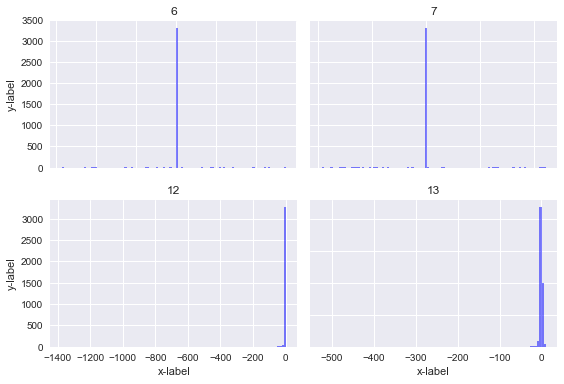

In [51]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(np.array(np.array(df_qt.pcrResult6.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('6')
axs[0, 1].hist(np.array(np.array(df_qt.pcrResult7.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 1].set_title('7')
axs[1, 0].hist(np.array(np.array(df_qt.pcrResult12.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[1, 0].set_title('12')
axs[1, 1].hist(np.array(np.array(df_qt.pcrResult13.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[1, 1].set_title('13')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

ax.grid(True)
fig.tight_layout()

plt.show()

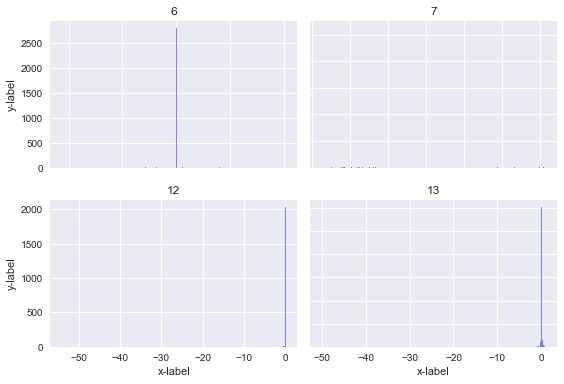

In [52]:
num_bins = 1000
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(np.array(np.array(df_scalar.pcrResult6.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('6')
axs[0, 1].hist(np.array(np.array(df_scalar.pcrResult7.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 1].set_title('7')
axs[1, 0].hist(np.array(np.array(df_scalar.pcrResult12.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[1, 0].set_title('12')
axs[1, 1].hist(np.array(np.array(df_scalar.pcrResult13.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[1, 1].set_title('13')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

ax.grid(True)
fig.tight_layout()

plt.show()

# Filter Method 1 - PCA
## Rescaled PCR results with mean 0 and variance 1, so that PCA will work properly. Otherwise if a feature takes improportional values in contrast to other feaures then the PCA will overweigh the covariance of that feature with others, assuming there is linear relationship between the features.

In [53]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=5)
pca.fit_transform(df_scalar) #plug in scaled values ( with outliers )

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.17330663 0.07435385 0.06933636 0.06661804 0.0654067 ]
[96.38067939 63.12975959 60.96251833 59.75556141 59.20978875]


In [54]:
pca.get_covariance()

array([[ 9.01806773e-01, -5.61515726e-02, -1.00356474e-01,
        -2.22024563e-02, -1.24015034e-03, -2.23989555e-02,
         2.70872609e-02, -1.60544151e-02,  2.02874243e-03,
         2.50663852e-02,  5.74870709e-02,  8.03925881e-02,
         8.30390342e-02,  5.04737117e-02, -1.66197785e-02,
         1.44056306e-02],
       [-5.61515726e-02,  8.89861634e-01, -6.22052085e-02,
         2.76144826e-03, -4.46777674e-02,  1.72424171e-02,
        -7.76866364e-03,  3.93917731e-02,  4.67759642e-02,
         7.70583012e-03, -2.84912156e-02,  7.29165005e-02,
         7.95655874e-02,  3.74503219e-03,  2.68148775e-02,
        -8.93278920e-02],
       [-1.00356474e-01, -6.22052085e-02,  1.38561171e+00,
         2.25330048e-02,  2.77234531e-02,  1.65547382e-02,
        -6.44551753e-03, -6.84108630e-03, -5.31683269e-02,
         6.17314171e-03, -1.51555950e-02, -5.92616937e-01,
        -6.18562287e-01, -1.45480357e-02,  1.25197289e-02,
         2.18787335e-01],
       [-2.22024563e-02,  2.76144826e

In [55]:
V = pca.components_
V

array([[-0.07530865, -0.0738032 ,  0.54146058,  0.01137145,  0.02156194,
         0.00539174, -0.00353619, -0.01166524, -0.0492893 ,  0.00091459,
         0.00175531, -0.55543961, -0.5802984 , -0.01375872,  0.00490473,
         0.21685052],
       [-0.13062162,  0.18472097,  0.03310311,  0.0023735 , -0.11196851,
         0.44160661, -0.01934089,  0.63250712,  0.10009228, -0.16553673,
         0.23286854,  0.00089294, -0.00421218, -0.07875281,  0.49054367,
        -0.0349251 ],
       [ 0.15307228,  0.05677078,  0.02300016,  0.14187215,  0.03268646,
         0.14647305,  0.22441744,  0.06277434,  0.0756748 ,  0.6043585 ,
        -0.03093814, -0.04667381, -0.02313991,  0.6866632 ,  0.12555767,
        -0.1180875 ],
       [-0.24167887, -0.01509179,  0.08714497,  0.37406511,  0.56599541,
         0.3223927 , -0.06608204, -0.04138189, -0.38995285,  0.04135124,
        -0.4108695 ,  0.10062266,  0.09342804, -0.1116164 ,  0.09598092,
         0.01913851],
       [ 0.49332646, -0.50754525, -0

 ## The Principal Components of the matrix are the vectors where the variance of the values of squared distances from the data to any normalized vector takes its maximal value. 
 ## This implies that the maximal coefficients of each Principal Component indicate the largest covariance among the respective features 
 ## Above, we got 5 principal components, next we will determine the largest coefficents (in absolute value) in each of the Principal Component, in accordance with some relevant threshold value, which is determined by the values of the coefficients in the particular principal component.

In [56]:
#sort arrays

cov = np.zeros( (5,4) )
for i in range(5):
    sort = np.sort( np.absolute(V[i]) )
    for j in range(4):
        cov[i][j]=sort[15-j]


In [57]:
cov

array([[0.5802984 , 0.55543961, 0.54146058, 0.21685052],
       [0.63250712, 0.49054367, 0.44160661, 0.23286854],
       [0.6866632 , 0.6043585 , 0.22441744, 0.15307228],
       [0.56599541, 0.4108695 , 0.38995285, 0.37406511],
       [0.50754525, 0.49332646, 0.4269071 , 0.37001526]])

In [91]:
#matrix of indices

cov_idx = np.zeros( (5,4) )

for i in range(5):
    where =  [ (idx+1)  for idx, item in enumerate(V[i]) if np.absolute(item) >= cov[i][3] ] #  indices of 3 maximal coefficients
    for j in range(4):
        cov_idx[i][j] = where[j]
        
keep = [ int(cov_idx[i][j])  for i in range(3) for j in range(4)]
keep_cols =[ 'pcrResult{}'.format(itr) for itr in keep]

keep_cols

X_train[keep_cols]

,pcrResult2,pcrResult9,pcrResult12,pcrResult15,pcrResult7,pcrResult9,pcrResult10,pcrResult14,pcrResult2,pcrResult9,pcrResult12,pcrResult14
2794,-0.366425,1.472229,0.853404,0.835182,NaN,1.472229,-0.508868,7.364340,-0.366425,1.472229,0.853404,7.364340
4431,0.206253,1.379438,0.942856,1.049350,-0.262109,1.379438,-0.831309,4.203809,0.206253,1.379438,0.942856,4.203809
4910,0.430426,0.672456,0.039584,-1.406736,-1.099206,0.672456,-0.137651,2.545314,0.430426,0.672456,0.039584,2.545314
4732,-0.378732,1.053950,0.473417,-0.750423,-0.497809,1.053950,0.003013,4.444799,-0.378732,1.053950,0.473417,4.444799
2287,NaN,NaN,-1.597735,0.440568,-0.620629,NaN,-0.789739,0.416154,NaN,NaN,-1.597735,0.416154
3327,-0.418083,NaN,NaN,-1.755776,-1.326425,NaN,-0.132517,1.698215,-0.418083,NaN,NaN,1.698215
1443,0.692374,2.109945,2.551446,0.776224,2.356700,2.109945,1.586628,2.358744,0.692374,2.109945,2.551446,2.358744
4577,0.220259,0.194482,-0.116969,0.756241,1.345758,0.194482,0.725547,3.031406,0.220259,0.194482,-0.116969,3.031406
2133,-0.100441,NaN,0.487949,-0.452610,0.570646,NaN,NaN,1.761397,-0.100441,NaN,0.487949,1.761397
1984,-0.067255,1.652994,0.701202,NaN,1.687872,1.652994,1.043692,4.109825,-0.067255,1.652994,0.701202,4.109825


## Validate results using pearson correlation

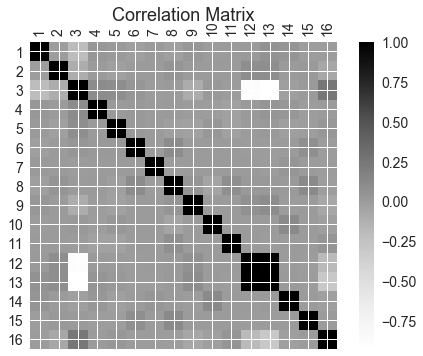

In [60]:
relevant_fields = ["pcrResult" + str(i+1) for i in range(16)]  
ticks_names = [str(i+1) for i in range(16)]  

ds_obj_pcr = X_train[relevant_fields]
corr_df = ds_obj_pcr.corr('pearson') #returns correlation matrix

# show as heatmap
f = plt.figure()
plt.matshow(corr_df, fignum=f.number)
plt.xticks(range(16), ticks_names, fontsize=14, rotation = 'vertical')
plt.yticks(range(16), ticks_names, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

## Observe positive correlation of pcrResult12 and pcrResult 13 
## negative correlation of 12,13 and 3
## negative correlation of 12,13 with 16
## positive correlation of 3 and 16
## In conclusion pcrResult 12,13,3,16 are highly correlated

## A less significant correlation can be seen 
## positive correlation of 6,8 and 15,8 and 6,15

# These results coincide with first two Principal Components using Standard Scaler Then result using Standard Scaler is robust

# Wrapper Method

## Sequential Backward Selector

In [77]:
import back
back.SeqBackSel(df_scalar, df_scalar_val, y_train.atRisk, y_val.atRisk)

[1, 2, 3, 4, 5, 8, 10, 11, 12, 13]

In [93]:
# features most important for risk

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


full = [ item+1 for item in range(16)] #backward propegation

for m in range(6): #picked some number of removals of features
    scores= []
    for item in full:
        kn = KNeighborsClassifier( n_neighbors = 5, weights= 'distance' ) # weights= 'uniform'
        removed_cols = [ 'pcrResult{}'.format(itr+1) for itr in range(16) if itr+1 not in full]
        removed_df = df_scalar.drop( columns= ['pcrResult{}'.format(item)] + removed_cols ) 
        kn.fit( removed_df, y_train.atRisk )
        vals = kn.predict(df_scalar_val.drop( columns=['pcrResult{}'.format(item)] + removed_cols ))
        this_score = f1_score(y_val.atRisk, vals, average='weighted' ) #f_1 score
        scores.append( ( item ,this_score) )
    arr = [ scores[k][1] for k in range(len(scores))]
    amax = np.amax(np.array(arr))
    amax_idx = [ scores[l] for l in range(len(scores)) if scores[l][1]  == amax ][0][0] #indx when dropped scoring is maximal
    full = [ item for item in full if item != amax_idx]
drop = [ 'pcrResult{}'.format(item+1) for item in range(16) if (item+1) not in full]
X_train.drop(columns=drop)

[6, 7, 9, 14, 15, 16]

In [83]:
#sequential backward selector on other data

cols = ['AvgHouseholdExpenseOnPresents','AvgHouseholdExpenseOnSocialGames', 'AvgHouseholdExpenseParkingTicketsPerYear', 'AvgTimeOnStuding'] 

expense_df = X_train[cols]

# features most important for risk

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


full = [ item+1 for item in range(16)] #backward propegation

for m in range(6): #picked some number of removals of features
    scores= []
    for item in full:
        kn = KNeighborsClassifier( n_neighbors = 5, weights= 'distance' ) # weights= 'uniform'
        removed_cols = [ 'pcrResult{}'.format(itr+1) for itr in range(16) if itr+1 not in full]
        removed_df = df_scalar.drop( columns= ['pcrResult{}'.format(item)] + removed_cols ) 
        kn.fit( removed_df, y_train.atRisk )
        vals = kn.predict(df_scalar_val.drop( columns=['pcrResult{}'.format(item)] + removed_cols ))
        this_score = f1_score(y_val.atRisk, vals, average='weighted' ) #f_1 score
        scores.append( ( item ,this_score) )
    arr = [ scores[k][1] for k in range(len(scores))]
    amax = np.amax(np.array(arr))
    amax_idx = [ scores[l] for l in range(len(scores)) if scores[l][1]  == amax ][0][0] #indx when dropped scoring is maximal
    full = [ item for item in full if item != amax_idx]
X_train.columns.tolist()

[1, 2, 3, 4, 5, 8, 10, 11, 12, 13]

# Sequential Forward Selector

In [287]:
#REMOVED LOCATION FROM FEATURES

cols =['AgeGroup','AvgHouseholdExpenseOnPresents','AvgHouseholdExpenseOnSocialGames',
        'AvgHouseholdExpenseParkingTicketsPerYear','AvgMinSportsPerDay','AvgTimeOnSocialMedia','AvgTimeOnStuding','BMI','BloodType','DateOfPCRTest',
        'DisciplineScore','HappinessScore','Job','NrCousins','SelfDeclarationOfIllnessForm','Sex','StepsPerYear','SyndromeClass','TimeOnSocialActivities']

X_train_sfs = X_train[cols]
X_train_sfs = X_train_sfs.fillna(X_train_sfs.mean())

#from sklearn.neighbors import KNeighborsClassifier
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS #import from mlxtend library
#knn = KNeighborsClassifier(n_neighbors=2) # ml_algo used = knn
#sfs = SFS(knn, 
#           k_features=3, 
#           forward=True, # if forward = True then SFS otherwise SBS
#           floating=False, 
#           verbose=2,
#           scoring='accuracy'
#           )
##after applying sfs fit the data:
#sfs.fit(X_train_sfs, y_train)
#sfs.k_feature_names_  
## to get the final set of features
##our sfs part has done here
##now towards results
X_train_sfs

,AgeGroup,AvgHouseholdExpenseOnPresents,AvgHouseholdExpenseOnSocialGames,AvgHouseholdExpenseParkingTicketsPerYear,AvgMinSportsPerDay,AvgTimeOnSocialMedia,AvgTimeOnStuding,BMI,BloodType,DateOfPCRTest,DisciplineScore,HappinessScore,Job,NrCousins,SelfDeclarationOfIllnessForm,Sex,StepsPerYear,SyndromeClass,TimeOnSocialActivities
2794,4.000000,439.490254,892.585974,757.106040,145.831467,300.332287,184.766164,30.869520,NaN,9/28/2020,3.000000,6.00000,Chief Executive Officer,13.000000,NaN,F,1.733835e+07,2.000000,44.815715
4431,2.000000,448.945921,922.481436,1130.938664,58.664801,264.098554,134.914126,29.329071,A-,NaN,4.000000,5.00000,NaN,15.889472,Fatigue; Diarrhea; Nausea_or_vomiting,M,6.765058e+06,2.000000,54.264974
4910,3.000000,545.373594,1092.674226,354.031584,82.087869,300.332287,184.766164,26.545667,A-,3/21/2020,1.000000,7.00000,Electrical engineer,19.000000,Headache; New_loss_of_taste_or_smell; New_loss...,NaN,9.722960e+06,3.000000,65.295461
4732,2.000000,524.276541,1052.650270,1343.069217,110.680443,300.332287,184.766164,28.629544,A-,4/21/2020,6.000000,6.28582,NaN,15.000000,Headache; Headache; Nausea_or_vomiting,M,1.366748e+07,1.000000,52.995329
2287,3.000000,495.017716,1022.293222,1155.976331,188.735078,5.629694,184.766164,28.410360,NaN,10/6/2020,5.000000,6.28582,Volunteer coordinator,15.000000,Shortness_of_breath; Diarrhea; Diarrhea,NaN,1.171265e+07,2.512917,50.856459
3327,3.000000,511.070602,1029.180190,1130.938664,97.270967,300.332287,184.766164,30.939558,A-,10/16/2020,5.307434,5.00000,NaN,15.000000,Muscle_or_body_aches; Headache; Headache,F,1.171265e+07,3.000000,51.530100
1443,3.000000,694.178784,1367.944743,1548.496280,26.859350,300.332287,184.766164,30.972527,O+,NaN,5.307434,7.00000,Podiatrist,20.000000,Nausea_or_vomiting; Nausea_or_vomiting; Headache,F,1.171265e+07,1.000000,68.762561
4577,3.000000,430.479333,852.027276,946.224169,50.057404,300.332287,184.766164,30.679013,B+,9/9/2020,5.307434,6.28582,"Engineer, maintenance (IT)",13.000000,Muscle_or_body_aches; Muscle_or_body_aches; Co...,NaN,6.054204e+06,3.000000,42.441379
2133,5.000000,545.373594,1092.674226,752.002201,130.140280,300.332287,184.766164,21.455128,B-,6/21/2020,3.000000,6.00000,NaN,14.000000,Shortness_of_breath; Nausea_or_vomiting; Nause...,NaN,1.551106e+07,2.512917,49.003391
1984,5.000000,318.528940,645.563205,1344.490576,97.270967,300.332287,184.766164,40.109148,NaN,6/29/2020,5.307434,6.28582,NaN,10.000000,Shortness_of_breath; Muscle_or_body_aches; New...,M,1.372244e+07,3.000000,32.245007


# Anomaly and Outlier Detection

# BMI
## body mass index is a weight/ (height)^2 , then values above 45 are nearly physically impossible

In [134]:
bmi = np.array(df.BMI.fillna(np.nanmedian(df.BMI)).tolist()) 
np.amax(bmi)

434.1498462

In [135]:
bmi[bmi>45]=45 #truncate outliers
bmi

array([34.357918  , 29.05044672, 29.05044672, ..., 30.28286709,
       24.1362321 , 29.05044672])

In [136]:
fig, ax = plt.subplots()
ax.plot(np.array(np.sort(bmi)))

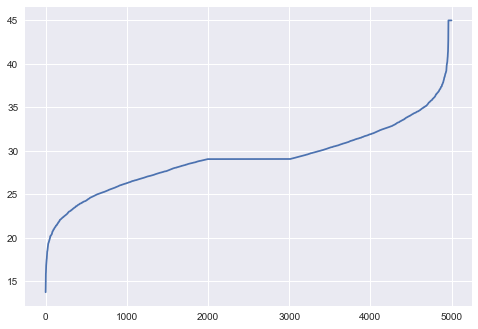

In [137]:
plt.show()

In [138]:
print("variance is {}".format(bmi.var())) #looks like symmetric distribution with average 30 and cutoff accurate from that symmetry
print("mean is {}".format(bmi.mean()))
print("meadian is {}".format(np.median(bmi)))

variance is 15.583658012413117
mean is 29.159395510901998
meadian is 29.05044672


In [139]:
df['BloodType']=df['BloodType'].astype('category')
bt=np.array(df.BloodType.cat.codes)
bt=bt[bt != -1]
print(np.histogram(bt))
bt

(array([513, 498, 509,   0, 534, 479,   0, 495, 468, 492], dtype=int64), array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]))


array([2, 6, 1, ..., 7, 4, 4], dtype=int8)

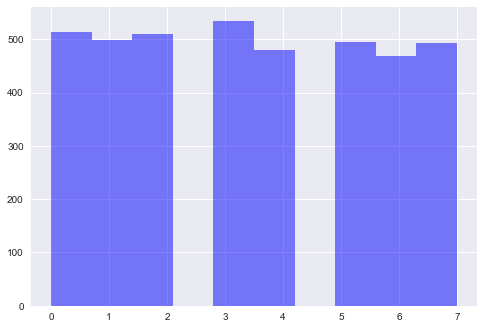

In [140]:
num_bins = 10
n, bins, patches = plt.hist(np.array(bt), num_bins, facecolor='blue', alpha=0.5)
plt.show()

C:\Users\Snir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Snir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


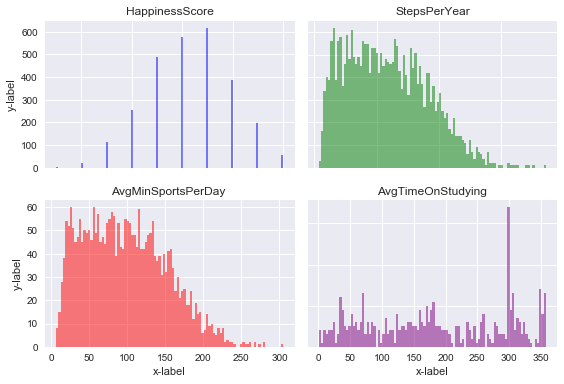

In [141]:
num_bins = 100
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(np.array(np.array(X_train.HappinessScore.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('HappinessScore')
axs[0, 1].hist(np.array(np.array(X_train.StepsPerYear.tolist())), num_bins, facecolor='green', alpha=0.5)
axs[0, 1].set_title('StepsPerYear')
axs[1, 0].hist(np.array(np.array(X_train.AvgMinSportsPerDay .tolist())), num_bins, facecolor='red', alpha=0.5)
axs[1, 0].set_title('AvgMinSportsPerDay ')
axs[1, 1].hist(np.array(np.array(X_train.AvgTimeOnStuding.tolist())), num_bins, facecolor='purple', alpha=0.5)
axs[1, 1].set_title('AvgTimeOnStudying')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

ax.grid(True)
fig.tight_layout()

plt.show()

C:\Users\Snir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Snir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


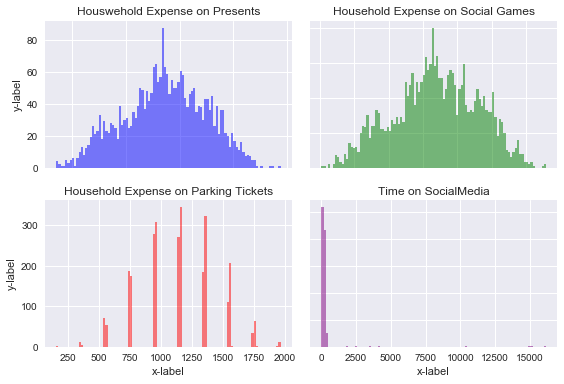

In [142]:
num_bins = 100
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(np.array(np.array(X_train.AvgHouseholdExpenseOnPresents.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('Houswehold Expense on Presents')
axs[0, 1].hist(np.array(np.array(X_train.AvgHouseholdExpenseOnSocialGames.tolist())), num_bins, facecolor='green', alpha=0.5)
axs[0, 1].set_title('Household Expense on Social Games')
axs[1, 0].hist(np.array(np.array(X_train.AvgHouseholdExpenseParkingTicketsPerYear.tolist())), num_bins, facecolor='red', alpha=0.5)
axs[1, 0].set_title('Household Expense on Parking Tickets')
axs[1, 1].hist(np.array(np.array(X_train.AvgTimeOnSocialMedia.tolist())), num_bins, facecolor='purple', alpha=0.5)
axs[1, 1].set_title('Time on SocialMedia')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

ax.grid(True)
fig.tight_layout()

plt.show()

C:\Users\Snir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Snir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


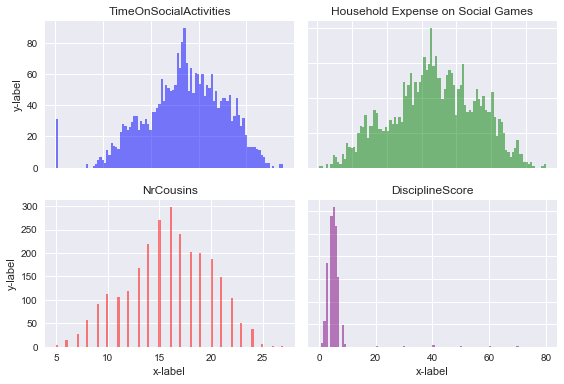

In [143]:
num_bins = 100
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(np.array(np.array(X_train.TimeOnSocialActivities.tolist())), num_bins, facecolor='blue', alpha=0.5)
axs[0, 0].set_title('TimeOnSocialActivities')
axs[0, 1].hist(np.array(np.array(X_train.AvgHouseholdExpenseOnSocialGames.tolist())), num_bins, facecolor='green', alpha=0.5)
axs[0, 1].set_title('Household Expense on Social Games')
axs[1, 0].hist(np.array(np.array(X_train.NrCousins.tolist())), num_bins, facecolor='red', alpha=0.5)
axs[1, 0].set_title('NrCousins')
axs[1, 1].hist(np.array(np.array(X_train.DisciplineScore.tolist())), num_bins, facecolor='purple', alpha=0.5)
axs[1, 1].set_title('DisciplineScore')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

ax.grid(True)
fig.tight_layout()

plt.show()

# As can be seen in histograms and in difference between mean and maximum value in X_train.describe() , Time on Social Media, discipline score, bmi,  have outliers 

In [23]:
ds = np.array(X_train.DisciplineScore.fillna(5))
ds[ds>20]=20 #truncate outliers

sm = np.array(X_train.AvgTimeOnSocialMedia.fillna(300))
sm[sm>600] = 600
sm

array([300.        , 264.09855361, 300.        , ..., 300.        ,
       300.        , 300.        ])

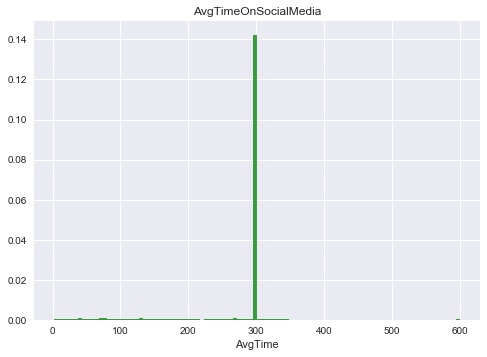

In [24]:


# Fixing random state for reproducibility
np.random.seed(19680801)
num_bins = 100

# the histogram of the data
n, bins, patches = plt.hist(sm, num_bins, density=True, facecolor='g', alpha=0.75)


plt.xlabel('AvgTime')
plt.title('AvgTimeOnSocialMedia')

plt.grid(True)
plt.show()

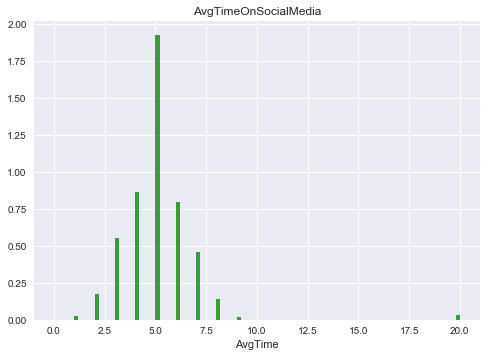

In [25]:

# Fixing random state for reproducibility
np.random.seed(19680801)
num_bins = 100

# the histogram of the data
n, bins, patches = plt.hist(ds, num_bins, density=True, facecolor='g', alpha=0.75)


plt.xlabel('AvgTime')
plt.title('AvgTimeOnSocialMedia')

plt.grid(True)
plt.show()

In [39]:
x = X_train.CurrentLocation
x = x.fillna("(Decimal('-67.5342235'), Decimal('147.951103'))")
li = x.tolist()
len(li)

3350

In [40]:
reg='-?\d+\.?\d*'
match="(Decimal('21.434580'), Decimal('-103.928014'))"
re.findall(reg, match)

['21.434580', '-103.928014']

In [41]:
regex = '-?\d+\.?\d*'           

loc = [ [ re.findall(regex, match)[0], re.findall(regex, match)[1]]
                                                for match in li ]


for item in loc:
    item[0]=float(item[0])
    item[1]=float(item[1])
    
locx = np.array([match[0] for match in loc])
locy = np.array([match[1] for match in loc])
locx

array([-67.5342235,  -2.2998625,   6.2666935, ...,  29.378665 ,
       -28.8921795, -40.499459 ])

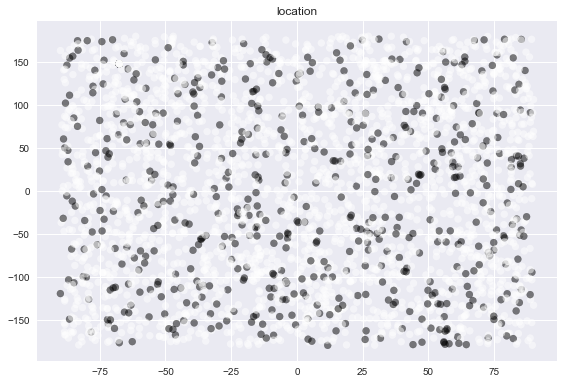

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

flue = y_train.cold

color =  ((np.array(flue) +4)^2)

fig, ax = plt.subplots()
ax.scatter(np.array(locx), np.array(locy), c=color,  alpha=0.5)


ax.set_title('location')

ax.grid(True)
fig.tight_layout()

plt.show()

In [96]:
X_train.AvgTimeOnSocialMedia

AttributeError: 'DataFrame' object has no attribute 'AvgTimeOnSocialMedia'

In [43]:
print("variance is {}".format(locx.var()))
print("mean is {}".format(locx.mean()))
print("meadian is {}".format(np.median(locx)))

variance is 2977.7251010951854
mean is -11.437288265074624
meadian is -18.644996


In [46]:
print("variance is {}".format(bmi.var())) #looks like symmetric distribution with average 30 and cutoff accurate from that symmetry
print("mean is {}".format(bmi.mean()))
print("meadian is {}".format(np.median(bmi)))

variance is 15.583658012797805
mean is 29.159395510734768
meadian is 29.050446719385697


In [47]:
#remove all nan
a = np.array(df.SyndromeClass.fillna(-1))
a

array([ 2.,  3.,  1., ..., -1.,  1., -1.])

In [48]:
tr = np.array(tr)
len(tr)

NameError: name 'tr' is not defined